# Following OSEMN framework

- carried forward from p1/d8-d6CarriedForward.....ipynb
- (Ctrl + f) "Day15 updates starts here" to jump to the updated part

## Obtain

- Load the dataset

In [76]:
# load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# chosen retail data from https://www.kaggle.com/manjeetsingh/retaildataset

# macos path
feat_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/Features data set.csv")
sales_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/sales data-set.csv")
stores_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/stores data-set.csv")

# # windows path
# feat_df = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/Features data set.csv")
# sales_df = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/sales data-set.csv")
# stores_df = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/stores data-set.csv")

## Scrub

- Scrub the data such that it is clean & ready to be analysed & implemented into a model

In [53]:
# ensure datetime in right format

feat_df['Date'] = pd.to_datetime(feat_df['Date'])
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [54]:
# head, tail , random sample

print(feat_df.head(3))
print(sales_df.tail(3))
print(stores_df.sample(3))

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
        Store  Dept       Date  Weekly_Sales  IsHoliday
421567     45    98 2012-12-10       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False
    Store Type    Size
18     19    A  203819
26     27    A  204184
16     17    B   93188


In [55]:
# merge the three dataframe into one, how we do it is we merge it on whichever columns that both df do shares

# combine feat_df & sales_df
df = pd.merge(sales_df, feat_df, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

# combine df & stores_df
df = pd.merge(df, stores_df, on = ['Store'], how = 'left')

df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
72313,8,27,2010-02-26,1367.00,False,37.91,2.561,NaN,NaN,NaN,NaN,NaN,214.694074,6.299,A,155078
87731,10,2,2011-04-29,109687.51,False,73.38,4.151,NaN,NaN,NaN,NaN,NaN,128.999867,8.494,B,126512
84396,9,46,2010-10-15,5582.69,False,67.36,2.720,NaN,NaN,NaN,NaN,NaN,215.358992,6.560,B,125833


In [56]:
# replace all NaN to 0 

df = df.fillna(0)
df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
342820,36,25,2011-04-03,8.50,False,64.55,3.282,0.0,0.0,0.00,0.00,0.00,212.576205,8.395,A,39910
14398,2,31,2010-10-22,2765.50,False,68.50,2.725,0.0,0.0,0.00,0.00,0.00,211.518721,8.163,A,202307
81185,9,19,2012-03-08,1055.49,False,90.23,3.417,11864.5,61.0,0.22,1659.09,2176.37,225.707044,5.277,B,125833


In [57]:
# convert 'Type' column from categorical to numerical
types_encoded, types = df['Type'].factorize()
df['Type'] = types_encoded

# convert 'IsHoliday' column from boolean to int
df['IsHoliday'] = df['IsHoliday'].astype(int)


df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
196094,20,85,2010-08-10,5167.55,0,51.50,2.764,0.00,0.00,0.00,0.00,0.00,204.951982,7.484,0,203742
264299,27,71,2011-11-25,21497.33,1,47.88,3.689,164.01,27.47,73934.06,24.22,540.56,140.421786,7.906,0,204184
214522,22,72,2012-08-17,50131.70,0,74.92,3.840,5160.04,91.43,0.00,2273.84,2354.36,142.215738,7.753,1,119557


In [58]:
# make sure that no duplicated feature column

print(f"number of feature columns that are duplicated : {df.duplicated().sum()}")
df.drop_duplicates(inplace = True)

number of feature columns that are duplicated : 0


In [59]:
# make sure that are no null values in our data table

# create new row called 'column type' and populate it with data type of each columns
col_info = pd.DataFrame(df.dtypes).T.rename(index = {0 : 'column type'})

# create new row called 'no of null val' and populate it with data type of each columns (clean data should return all 0)
col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0 : 'no of null val in that column'}))

# create new row called 'no of null val %' and populate it with data type of each columns (clean data should return all 0)
col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index = {0 : 'no of null val in that column %'}))

In [60]:
col_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column type,int64,int64,datetime64[ns],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
no of null val in that column,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
no of null val in that column %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Explore

- Understand more about the data (both feature & target variable)

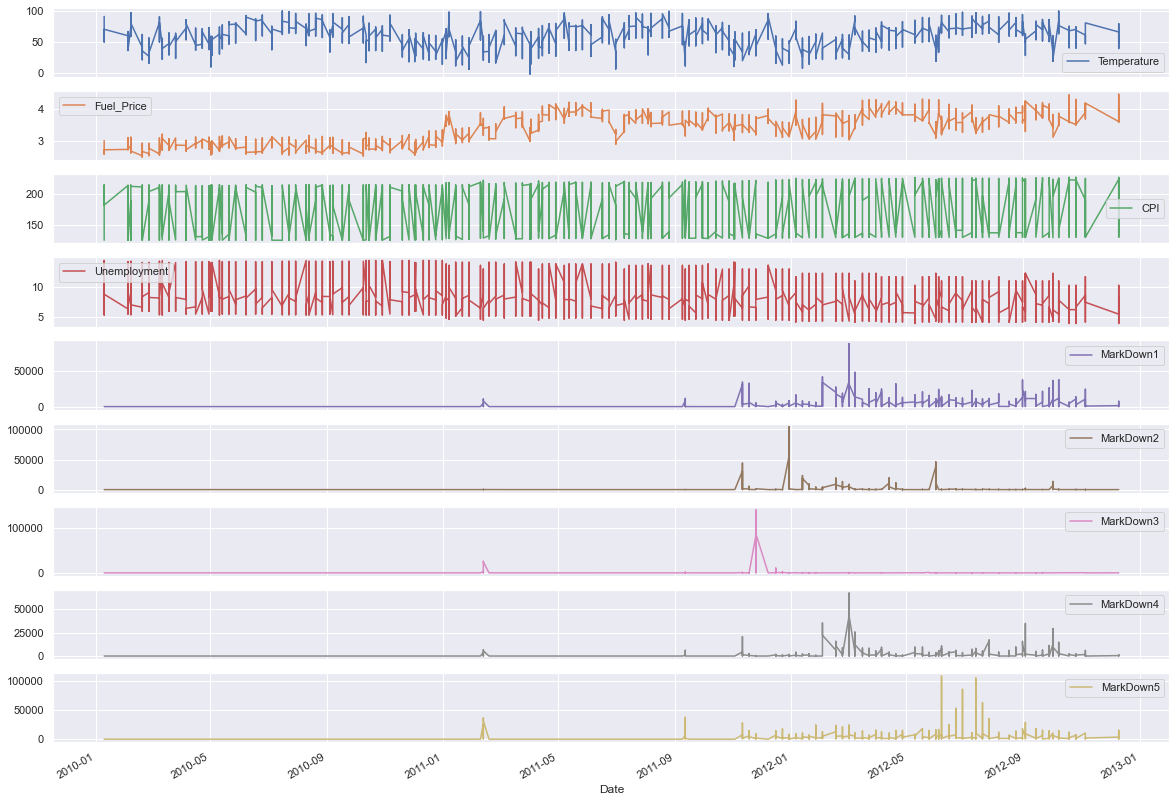

In [61]:
# features EDA 

df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3' ,'MarkDown4' ,'MarkDown5']].plot(x = 'Date', subplots = True, figsize = (20,15))

plt.show()


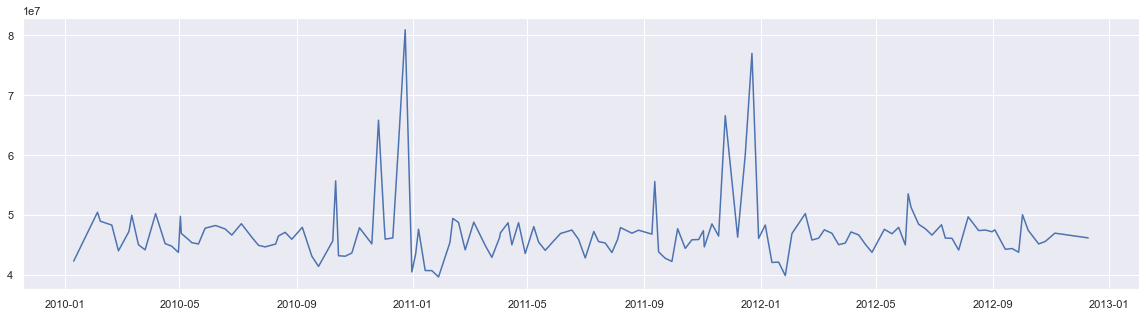

In [62]:
# target variable EDA

# want to predict sales, hence we add up all weekly sales from every shop
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

## Exploration from Day8 lesson starts here

- Show you can imagine whether a particular column has normal dist, or skew to left/right just from .describe()
- Boxplot to see each features behaviour (distribution, how much outlier OR most of the data are actually compiled thich within a range?)
- Heatmap : sees correaltion of each pair features
- Pairplot : helps us select which model to use (how?)


- Questions :
- boxplot : with this, we can see each features characteristics (distributions, outliers, etc). but what can do with this new information in order for us to be able to build better model ? (and for data with such natures as per screenshot, how do you propose to plot this in boxplot ? or even Explore it ?)


- pairplot : in lecture, it mentioned that pairplot 'helps us which model we want to use, example if we want to know which have linear relationship, see which one has closest forms diagonal line from left-bottom to right-upper of chart'
    - can explain how can this pairplot helps us which model to use ? , again if its use to see each other features relationships, we can achieve it with heatmap faster, correct ?
    - for identifying linear relationship, we can just use heatmap and see which one has > 0.7, correct ?

- i noticed that pairplot itself create a huge file itself. what are the other storage-friendly alternatives besides pairplot?

In [63]:
df.describe()

# Store : 
#   mean == 50% median  , normal dist
#   mean > std          , relatively narrow-ish curve 
# 
# Weekly_Sales :
#   mean >> 50% median  , left-skewed dist
#   mean << std         , flat curve


# # Cheat-sheet :
# 1) skewness
# mean > median, left-skewed dist
# mean == median, normal dist
# mean < median, right-skewed dist

# 2) kurtosis
# mean > std, narrow curve (leptokurtic, +ve kurtosis)
# mean = std, N(0,1) curve (mesokurtic, 0)
# mean < std, flat curve (platykurtic, -ve kurtosis)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [64]:
df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
265272,27,83,2010-12-17,10682.09,0,31.62,3.301,0.00,0.00,0.00,0.0,0.0,136.529281,8.021,0,204184
286502,29,98,2011-12-23,209.98,0,39.83,3.413,373.34,5.21,676.82,10.5,1730.4,136.588387,9.357,1,93638
309003,32,38,2010-01-10,52876.85,0,66.14,2.759,0.00,0.00,0.00,0.0,0.0,190.673824,9.137,0,203007


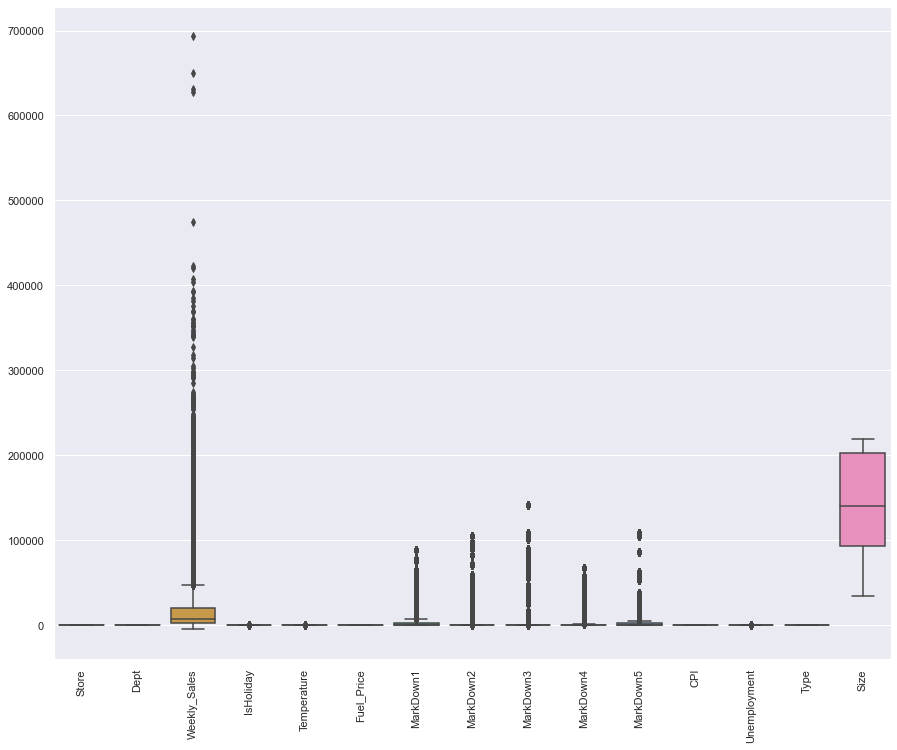

In [65]:
import seaborn as sns

# boxplot
sns.set(rc={'figure.figsize' : (15,12)})
bp = sns.boxplot(data = df)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90);


# lots of outlier, hence we will scale them using StandardScaler()

<AxesSubplot:>

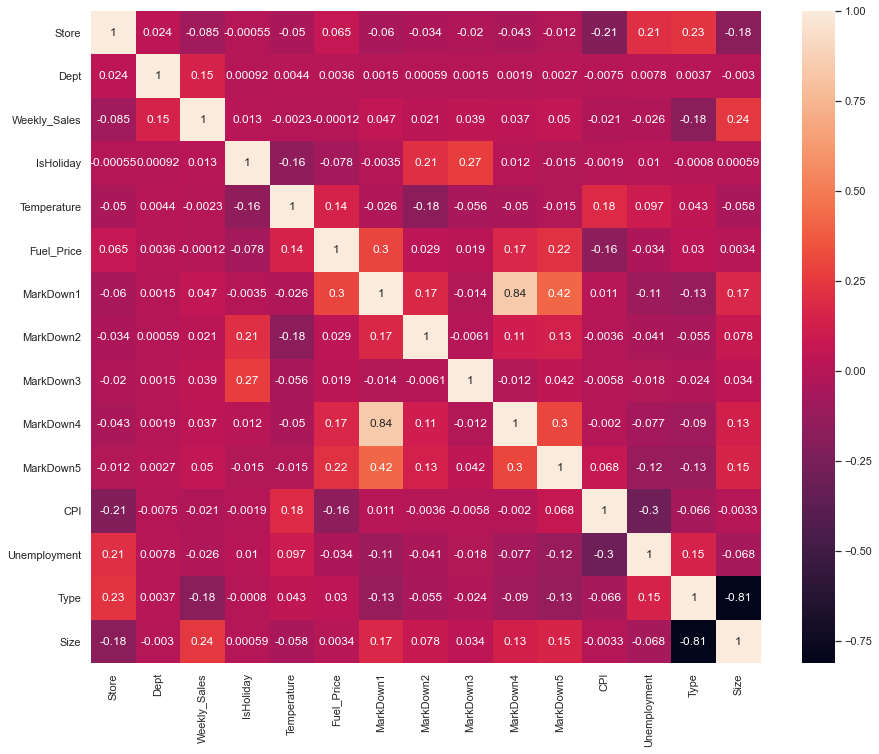

In [66]:
# heatmap 

corr_matrix = df.corr()

sns.set(font_scale = 1)
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot= True)

# 

In [67]:
# # Pairplot : commented out since this takes too much memory space (100mb+)
# df_s = df[['MarkDown1', 'MarkDown2']]

# sns.pairplot(df_s.sample(1000))

# Day15 updates starts here

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

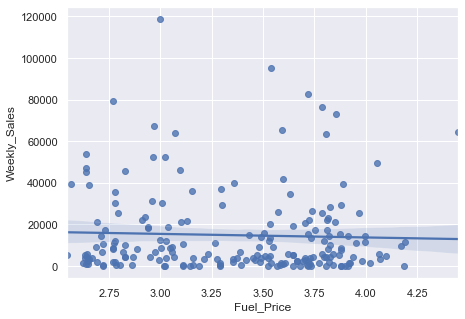

In [68]:
# regression plot targetVariable with one feature with highest correlation (Weekly_Sales & Size). (not pairplot as that one doesnt show the best-line-fit)

sns.set(rc = {'figure.figsize':(7,5)})
sns.regplot(data = df.sample(200), x = 'Fuel_Price' , y = 'Weekly_Sales')


In [69]:
# get_dummies takes InternetService feature and expand it into n number of features (scroll to the end)

# df = pd.get_dummies(data = df, columns=['Date'])
# df.sample(3)


# create features out of 'Date' column
df['day'] = df.Date.dt.day
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.head(3)



,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,day,month,year
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2,5,2010
1,1,1,2010-12-02,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2,12,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,19,2,2010


## Model

- using LinearRegression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [71]:
# # Model1 : all features except 'Date', StandardScaler(), LinearRegression

# assign features
X = df.drop(['Weekly_Sales', 'Date'], axis = 1)

# assign target variable
y = df['Weekly_Sales']

In [72]:
# train & test dataset split, using package, method1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# scale data using standardization
scaler = StandardScaler()

# create scaler model using train data (same idea as train model first before to scale the data)
scaler.fit(X_train)

# scale the features using the trained scaler (from "scaler.fit(X_train)")
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# call the model you want to use, this case is decisionTree
model = LinearRegression()
model = model.fit(X_train, y_train)

# get model accuracy using test data (LinearRegression has build-in accuracy calculation)
acc_score = model.score(X_test, y_test) 

print(f"Model Accuracy on TEST data is {(acc_score * 100):.2f}")

Model Accuracy on TEST data is 8.87


## Model 2 : Remove outlier to force it to become good predictor

- cant remove outlier, as when its holiday, theyre making an outlier weekly_sales (see heatmap below)

In [77]:
# remove outlier from dataset (remove data that is 2 std dev outside)

from scipy import stats
df_m2 = df.drop('Date', axis = 1)

z_score = stats.zscore(df_m2)
abs_z_score = np.abs(z_score)
filter_out_outliers = (abs_z_score < 2).all(axis = 1)
df_m2 = df_m2[filter_out_outliers]

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

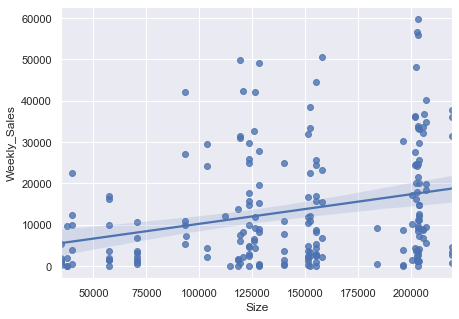

In [83]:
# see regplot after outlier drop

sns.set(rc = {'figure.figsize':(7,5)})
sns.regplot(data = df_m2.sample(200), x = 'Size' , y = 'Weekly_Sales')

<AxesSubplot:>

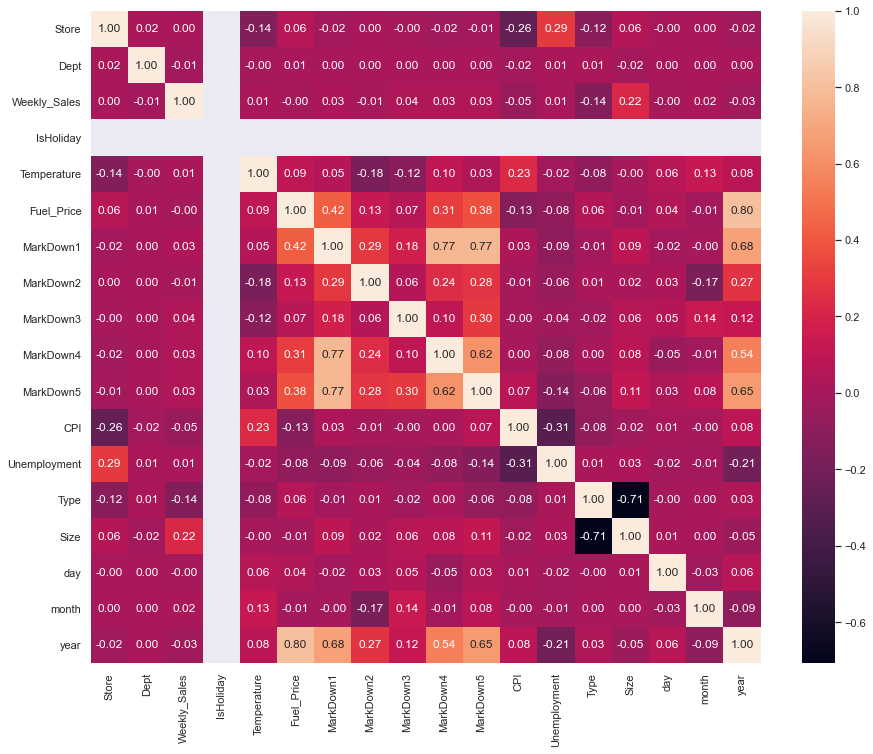

In [86]:
# see heatmap after outlier dropped

corr_matrix = df_m2.corr()

sns.set(font_scale = 1)
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot= True, fmt = ".2f")

# here we can see that we cant remove outlier, as when its holiday, theyre making an outlier weekly_sales (see heatmap below)

## iNterpret